<h4> Introduction</h4>
In this Notebook, we show how to model 2-dimensional incompressible flow in various settings using the complex potential $\Omega=\Phi(x,y)+i\psi(x,y)$, where $\Phi(x,y)$ is the velocity potential ($\vec{V}=-\nabla \Phi$) and $\psi$ is the stream function. The streamlines for the flow are the level curves $\psi(x,y)=constant$. 

We assume throughout that unless stated otherwise,
<ul>
    <li> our domain is the square with vertices (1,1),(-1,1),(-1,-1), and (1,-1).
    <li> if there are no transformations of the plane, obstructions to the flow, or singularities such as sources or sinks, flow is in the horizontal direction.
    </ul>
    
 We beginn by importing all the Python libraries which are needed to run this Notebook.   

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt #used for plots
plt.style.use('seaborn-white')
import numpy as np  #used for numerical computation
import cmath as cm    #used for complex arithmetic

<h4> 1. Uniform Flow </h4>
Uniform flow means flow is in one direction (eg. in the $x$ direction and the cross-sectional area $A$ is constant. The flow rate $q_u$ ($\frac{m^3}{s}$) and fluid velocity $V_x=q_u/A$ are constant at all points. In this case, Darcy's Law becomes
  
\begin{equation}
  V_x=\frac{q_u}{A}  =-\frac{d\Phi}{dx}.
\end{equation}


{\flushleft Integrating, we get} 
\begin{equation}
    \Phi(x)= -\frac{q_u}{A} x + \Phi_0. 
\end{equation}
For example, set $-\frac{q_u}{A}=1$ and $\Phi_0=0$.  Since $\psi_y(x,y)=\Phi_x=-1$, we let $\psi(x,y)=-y$ and so the complex potential is $\Omega(x,y)=-x-iy$ or   $\Omega(z)=-z$.

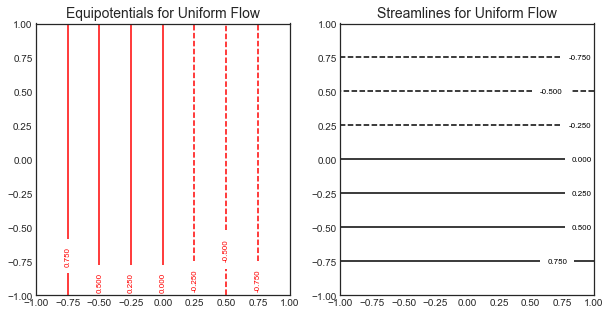

In [2]:
# create figure and axes
fig=plt.figure(figsize=(10,5))
plt.xlim=(-1,2)
plt.ylim=(-1,2)
# Set up Plot Grid
x = np.linspace(-1, 1, 250)
y = np.linspace(-1, 1, 250)
X, Y = np.meshgrid(x, y)

#Plot the equipotential lines
ax1 = fig.add_subplot(121)
ax1.set_title('Equipotentials for Uniform Flow',size=14)
Z = -X
contours=plt.gca().contour(X, Y, Z, levels=np.linspace(-1,1,9), colors='red');
plt.gca().clabel(contours, inline=True, fontsize=8)

#Plot the streamlines
ax2 = fig.add_subplot(122)
ax2.set_title('Streamlines for Uniform Flow',size=14)
Z = -Y
contours=plt.contour(X, Y, Z, levels=np.linspace(-1,1,9), colors='black');
plt.gca().clabel(contours, inline=True, fontsize=8)
plt.savefig('ILAPfig1UniformFlow.png')

<h4>2. Source at (0,0)</h4>
A source at (0,0) can be modelled by the complex potential
$\Omega(z)=log(z)=ln(|z|) + i arg(z)$ where $0\le arg(z)<\pi$.

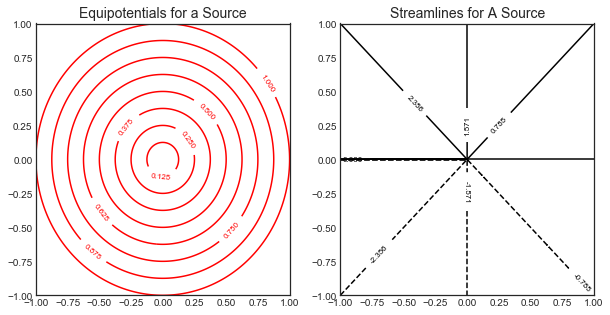

In [3]:
# create figure and axes
fig=plt.figure(figsize=(10,5))
plt.xlim=(-1,2)
plt.ylim=(-1,2)
# Set up Plot Grid
x = np.linspace(-1, 1, 250)
y = np.linspace(-1, 1, 250)
X, Y = np.meshgrid(x, y)

#Plot the equipotential lines
ax1 = fig.add_subplot(121)
ax1.set_title('Equipotentials for a Source',size=14)
Z = np.sqrt(X**2+Y**2)
contours=plt.gca().contour(X, Y, Z, levels=np.linspace(0,1,9), colors='red');
plt.gca().clabel(contours, inline=True, fontsize=8)

#Plot the streamlines
ax2 = fig.add_subplot(122)
ax2.set_title('Streamlines for A Source',size=14)
Z = np.arctan2(Y,X)
contours=plt.contour(X, Y, Z, levels=np.linspace(-np.pi,np.pi,9), colors='black');
plt.gca().clabel(contours, inline=True, fontsize=8)
plt.savefig('ILAPfig2Source.png')

<h4>3. Five Point Pattern</h4>
In the 5 point pattern we will surround the source with 4 equal strength sinks at the four corners of the domain ((1,1),(-1,1),(-1,1),(1,-1))

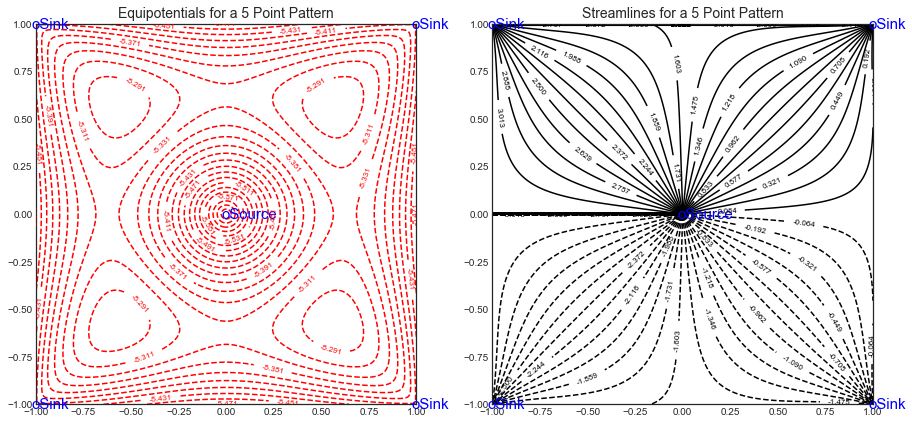

In [4]:
# create figure and axes
fig=plt.figure(figsize=(15,7))
plt.xlim=(-1,1)
plt.ylim=(-1,1)
# Set up Plot Grid
x = np.linspace(-1, 1, 250)
y = np.linspace(-1, 1, 250)
X, Y = np.meshgrid(x, y)

#Plot the equipotential lines
ax1 = fig.add_subplot(121)
ax1.set_title('Equipotentials for a 5 Point Pattern',size=14)
Z = np.sqrt(X**2+Y**2)-np.sqrt((X-1)**2+(Y-1)**2)-np.sqrt((X+1)**2+(Y-1)**2)-np.sqrt((X+1)**2+(Y+1)**2)-np.sqrt((X-1)**2+(Y+1)**2)
contours=plt.gca().contour(X, Y, Z, levels=np.linspace(-10,0,500), colors='red');
plt.gca().clabel(contours, inline=True, fontsize=8)
plt.gca().text(-.025,-.025,'oSource',size=15,color='b')
plt.gca().text(.975,.975,'oSink',size=15,color='b')
plt.gca().text(-1.025,.975,'oSink',size=15,color='b')
plt.gca().text(-1.025,-1.025,'oSink',size=15,color='b')
plt.gca().text(.975,-1.025,'oSink',size=15,color='b')

#Plot the streamlines
ax2 = fig.add_subplot(122)
ax2.set_title('Streamlines for a 5 Point Pattern',size=14)
Z = np.arctan2(Y,X)-np.arctan2(Y-1,X-1)-np.arctan2(Y-1,X+1)-np.arctan2(Y+1,X+1)-np.arctan2(Y+1,X-1)
contours=plt.contour(X, Y, Z, levels=np.linspace(-np.pi,np.pi,50), colors='black');
plt.gca().clabel(contours, inline=True, fontsize=8)
plt.gca().text(-.025,-.025,'oSource',size=15,color='b')
plt.gca().text(.975,.975,'oSink',size=15,color='b')
plt.gca().text(-1.025,.975,'oSink',size=15,color='b')
plt.gca().text(-1.025,-1.025,'oSink',size=15,color='b')
plt.gca().text(.975,-1.025,'oSink',size=15,color='b')

plt.savefig('ILAPfig3FivePt.png')

Note that because of the equal strength and symmetric arrangement, exaclty 1/4 of the flow goes from the source to each corner. For analyzing such 5-point patterns, we may therefore restrict attention to the upper right corner (square with vertices (0,0),(1,0),(1,1),(-1,1), since the flows in the other 3 corners are symmetric.